# Import Libraries

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv("../data/cleaned_book_ratings.csv")
print("Shape:", df.shape)
df.head()

Shape: (98605, 11)


,user_id,isbn,book_rating,location,user_age,title,author,year,publisher,img_url,num_of_rating
0,276747,0060517794,9,"iowa city, iowa, usa",25.0,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,20
1,276747,0671537458,9,"iowa city, iowa, usa",25.0,Waiting to Exhale,Terry McMillan,1995.0,Pocket,http://images.amazon.com/images/P/0671537458.0...,20
2,276747,0679776818,8,"iowa city, iowa, usa",25.0,Birdsong: A Novel of Love and War,Sebastian Faulks,1997.0,Vintage Books USA,http://images.amazon.com/images/P/0679776818.0...,10
3,276822,0060096195,10,"calgary, alberta, canada",11.0,The Boy Next Door,Meggin Cabot,2002.0,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,34
4,276822,0141310340,9,"calgary, alberta, canada",11.0,Skin and Other Stories (Now in Speak!),Roald Dahl,2002.0,Puffin Books,http://images.amazon.com/images/P/0141310340.0...,4


In [14]:
df['num_of_rating'].describe()

count    98605.000000
mean        33.144344
std         44.601586
min          4.000000
25%          7.000000
50%         15.000000
75%         40.000000
max        336.000000
Name: num_of_rating, dtype: float64

In [15]:
df.head()

,user_id,isbn,book_rating,location,user_age,title,author,year,publisher,img_url,num_of_rating
0,276747,0060517794,9,"iowa city, iowa, usa",25.0,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,20
1,276747,0671537458,9,"iowa city, iowa, usa",25.0,Waiting to Exhale,Terry McMillan,1995.0,Pocket,http://images.amazon.com/images/P/0671537458.0...,20
2,276747,0679776818,8,"iowa city, iowa, usa",25.0,Birdsong: A Novel of Love and War,Sebastian Faulks,1997.0,Vintage Books USA,http://images.amazon.com/images/P/0679776818.0...,10
3,276822,0060096195,10,"calgary, alberta, canada",11.0,The Boy Next Door,Meggin Cabot,2002.0,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,34
4,276822,0141310340,9,"calgary, alberta, canada",11.0,Skin and Other Stories (Now in Speak!),Roald Dahl,2002.0,Puffin Books,http://images.amazon.com/images/P/0141310340.0...,4


# Basic Info

In [16]:
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)


Missing values:
 user_id          0
isbn             0
book_rating      0
location         0
user_age         0
title            0
author           0
year             0
publisher        0
img_url          0
num_of_rating    0
dtype: int64

Data types:
 user_id            int64
isbn              object
book_rating        int64
location          object
user_age         float64
title             object
author            object
year             float64
publisher         object
img_url           object
num_of_rating      int64
dtype: object


# EDA

# Ratings Distribution

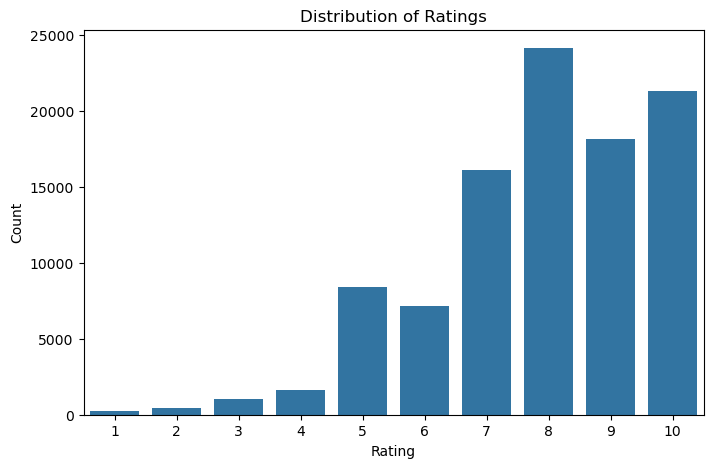

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x="book_rating", data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Top 10 Most Rated Books VS Worst Books 

In [19]:
# top 10 books 
top_books = df.sort_values(by='num_of_rating',ascending=False).drop_duplicates('title').head(10)

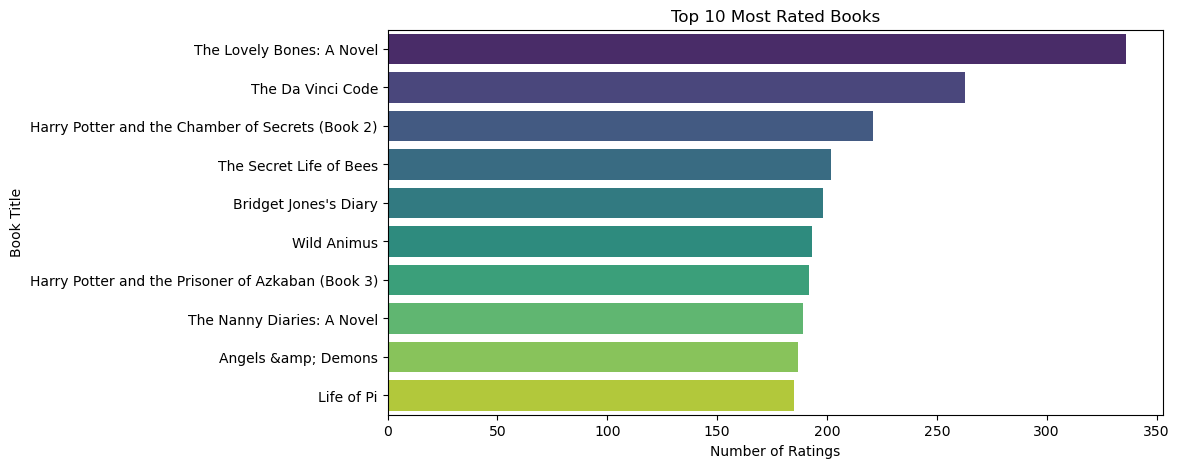

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(y=top_books.title, x=top_books.num_of_rating, palette="viridis")
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.show()


# Top 10 Authors by Ratings

In [21]:
top_authors = df['author'].value_counts().head(10)
print("\nTop 10 Authors:\n", top_authors)


Top 10 Authors:
 author
Stephen King          2657
Nora Roberts          1767
James Patterson       1238
John Grisham          1179
J. K. Rowling         1114
Dean R. Koontz         850
Janet Evanovich        842
Anne Rice              769
Mary Higgins Clark     744
Sue Grafton            646
Name: count, dtype: int64


# User Age Distribution

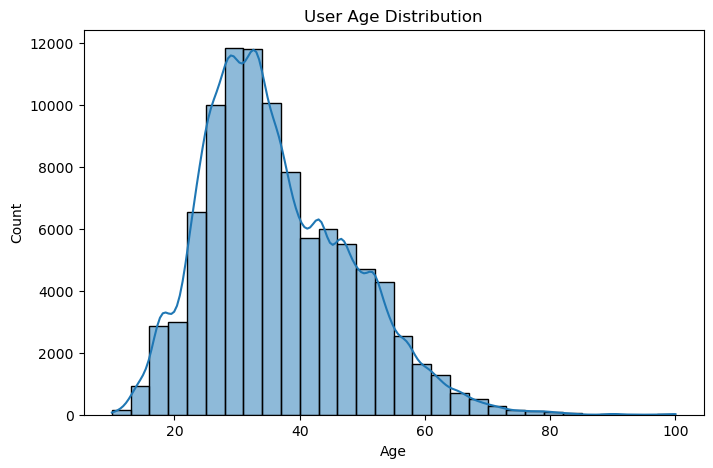

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['user_age'].dropna(), bins=30, kde=True)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Average Rating by Year of Publication

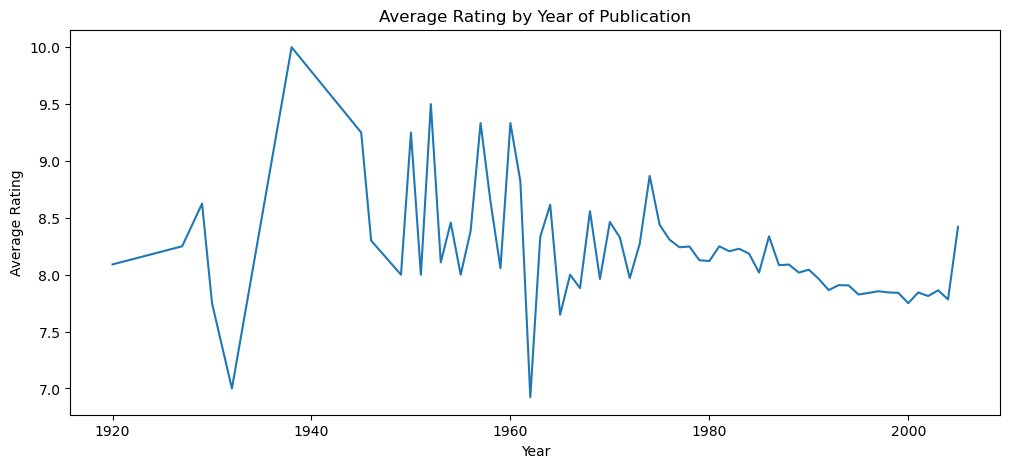

In [23]:
avg_rating_year = df.groupby("year")["book_rating"].mean().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x="year", y="book_rating", data=avg_rating_year)
plt.title("Average Rating by Year of Publication")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

# Top 10 Countries with Most Users

In [25]:
top_countries = df['location'].value_counts().head(10)

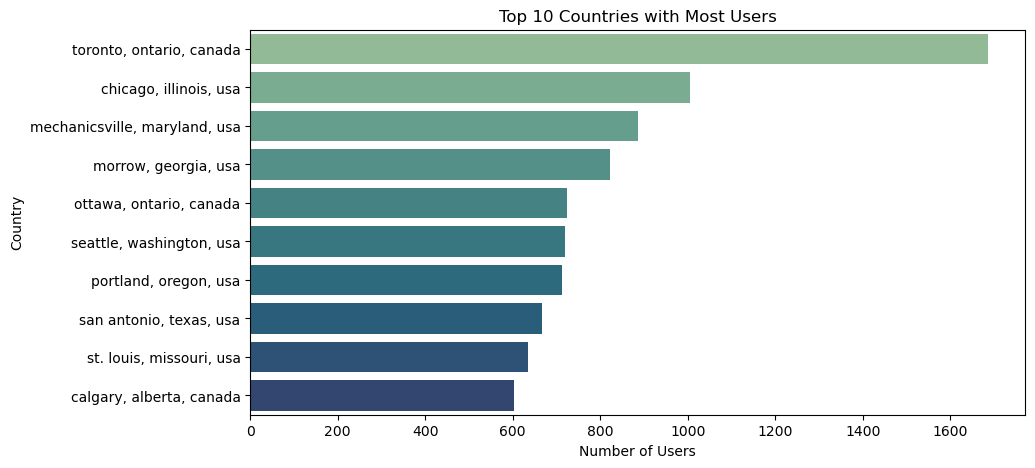

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="crest")
plt.title("Top 10 Countries with Most Users")
plt.xlabel("Number of Users")
plt.ylabel("Country")
plt.show()

# Top 10 Locations by Average Rating

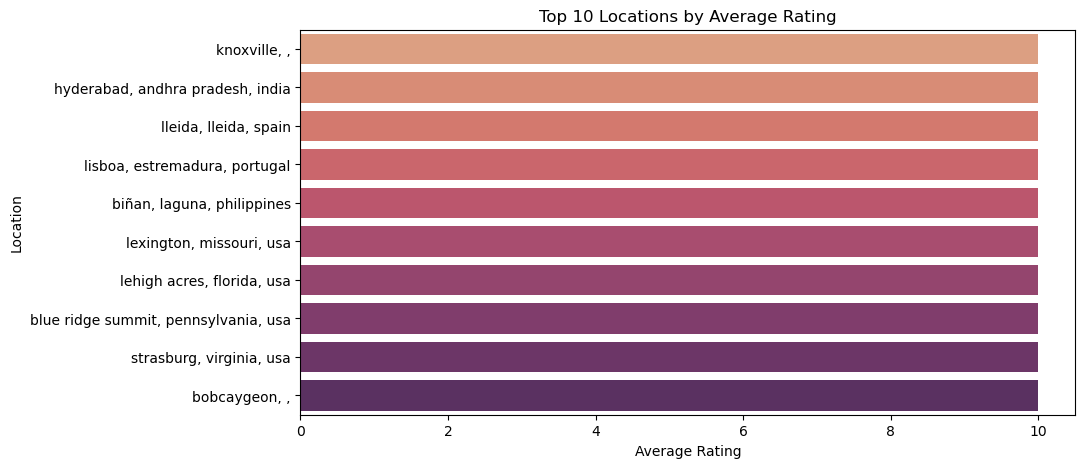

In [27]:
avg_rating_loc = df.groupby("location")["book_rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=avg_rating_loc.index, x=avg_rating_loc.values, palette="flare")
plt.title("Top 10 Locations by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Location")
plt.show()

# Correlation Heatmap

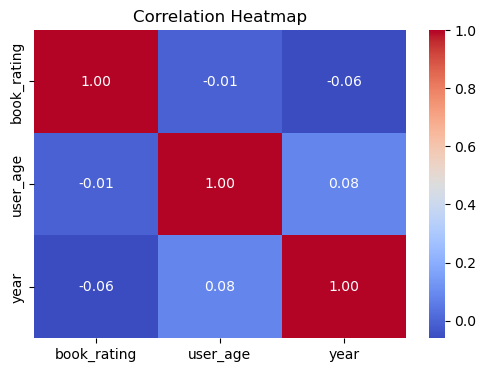

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['book_rating','user_age','year']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#  Distribution of Ratings by Age Groups (Boxplot)

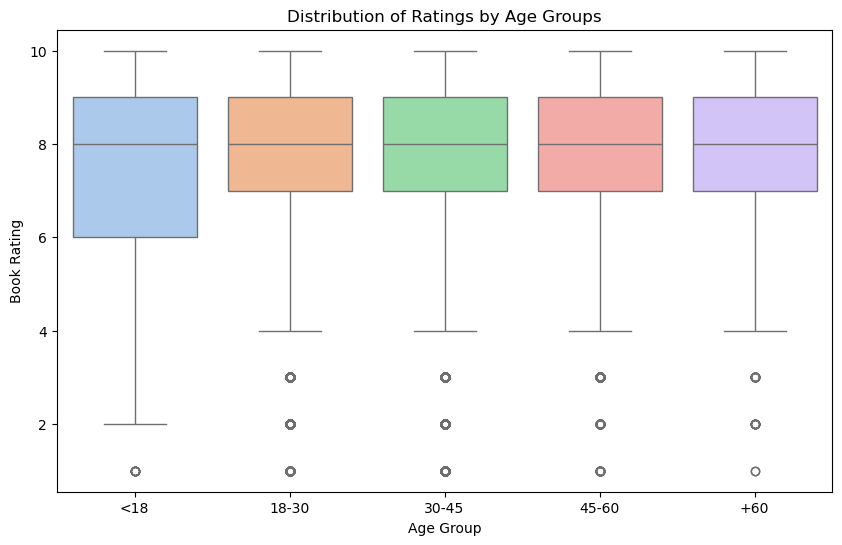

In [29]:
# Create age groups
df['age_group'] = pd.cut(df['user_age'], bins=[0,18,30,45,60,np.inf], labels=['<18','18-30','30-45','45-60','+60',])

plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='book_rating', data=df, palette="pastel")
plt.title("Distribution of Ratings by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Book Rating")
plt.show()


# Top 15 Publishers by Number of Books (Horizontal Barplot)

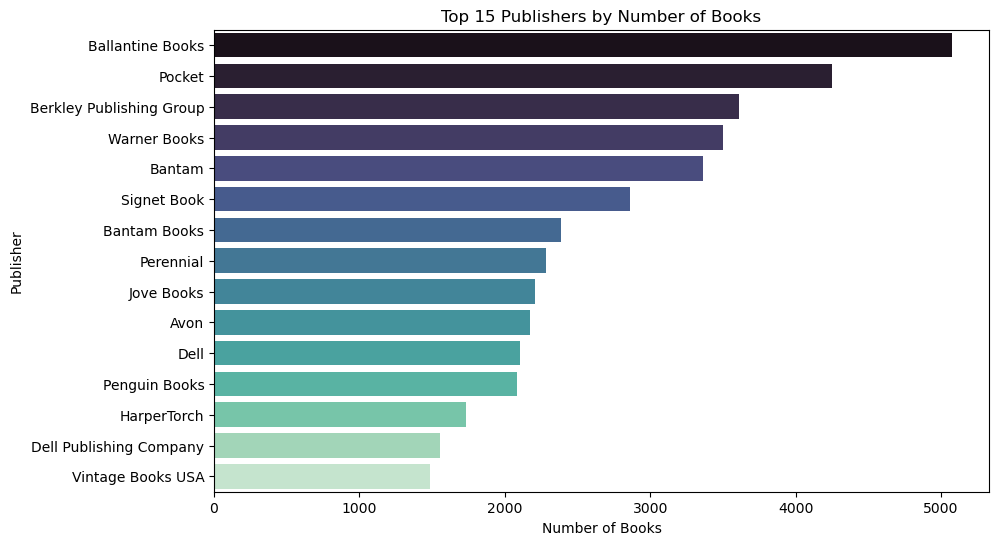

In [30]:
top_publishers = df['publisher'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="mako")
plt.title("Top 15 Publishers by Number of Books")
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.show()


# Scatterplot: User Age vs Book Rating (with transparency)

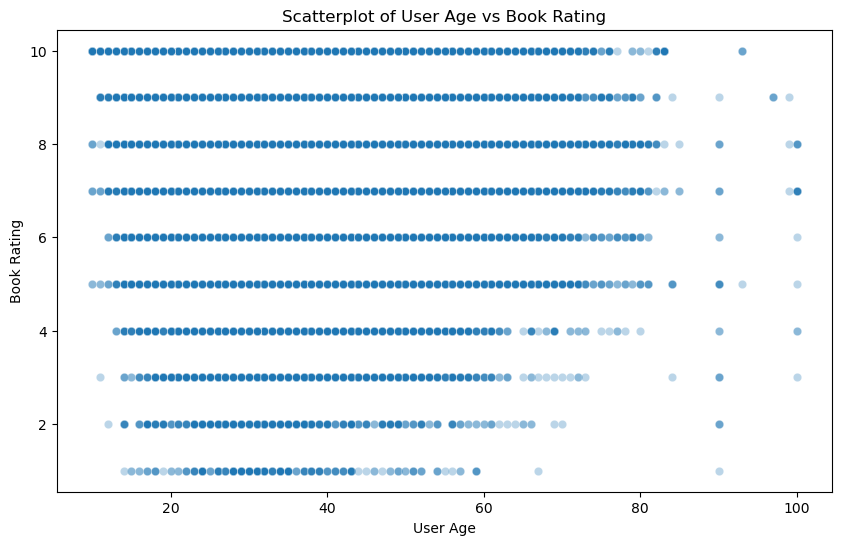

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_age', y='book_rating', data=df, alpha=0.3)
plt.title("Scatterplot of User Age vs Book Rating")
plt.xlabel("User Age")
plt.ylabel("Book Rating")
plt.show()
